<a href="https://colab.research.google.com/github/aayushme/AI-Project/blob/master/facedatatraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#added comments
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
#creating env variables
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [ ]:
#downloading kaggle dataset
!kaggle datasets download -d rahulkashyap14298/myfacesdata

 53% 6.00M/11.3M [00:00<00:00, 60.4MB/s]
100% 11.3M/11.3M [00:00<00:00, 72.1MB/s]


In [ ]:
!unzip "/content/myfacesdata.zip"

Archive:  /content/myfacesdata.zip
  inflating: itsme/rahul0.jpg        
  inflating: itsme/rahul1.jpg        
  inflating: itsme/rahul10.jpg       
  inflating: itsme/rahul100.jpg      
  inflating: itsme/rahul101.jpg      
  inflating: itsme/rahul102.jpg      
  inflating: itsme/rahul103.jpg      
  inflating: itsme/rahul104.jpg      
  inflating: itsme/rahul105.jpg      
  inflating: itsme/rahul106.jpg      
  inflating: itsme/rahul107.jpg      
  inflating: itsme/rahul108.jpg      
  inflating: itsme/rahul109.jpg      
  inflating: itsme/rahul11.jpg       
  inflating: itsme/rahul110.jpg      
  inflating: itsme/rahul111.jpg      
  inflating: itsme/rahul112.jpg      
  inflating: itsme/rahul113.jpg      
  inflating: itsme/rahul114.jpg      
  inflating: itsme/rahul115.jpg      
  inflating: itsme/rahul116.jpg      
  inflating: itsme/rahul117.jpg      
  inflating: itsme/rahul118.jpg      
  inflating: itsme/rahul119.jpg      
  inflating: itsme/rahul12.jpg       
  inflating: it

In [ ]:
os.mkdir("/content/mydata")

In [ ]:
#moving files
import shutil
files = ['/content/itsme','/content/itsnotme']
for f in files:
    shutil.move(f, '/content/mydata')

In [ ]:
#importing required libraries
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
bs=64

In [ ]:
path=""
tfms = get_transforms()
data = ImageDataBunch.from_folder( Path("/content/mydata"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

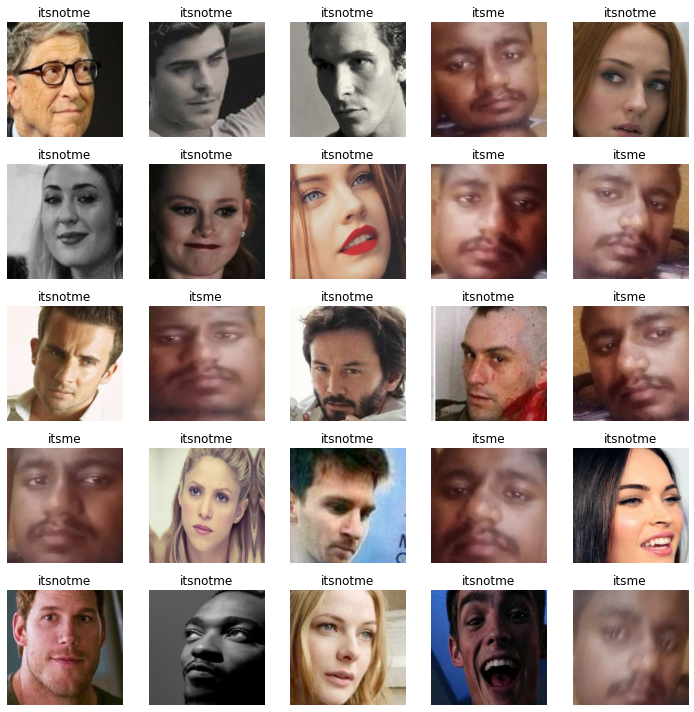

In [ ]:
data.show_batch(rows=10, figsize=(15,15))

In [ ]:
print(data.classes)
len(data.classes)

['itsme', 'itsnotme']


2

In [ ]:
resnet_learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
resnet_learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.271359,0.077985,0.021583,10:08
1,0.114901,0.000818,0.000000,10:12
2,0.064863,0.000301,0.000000,10:18
3,0.040967,0.000297,0.000000,10:17


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [ ]:

os.makedirs("/content/drive/My Drive/face-recognition/facedata",exist_ok=True)

In [ ]:
my_dir="/content/drive/My Drive/face-recognition/facedata"

In [ ]:
resnet_learn.save(my_dir+"/Stage-1")

In [ ]:
resnet_learn.load("/content/drive/My Drive/face-recognition/facedata/Stage-1")

Learner(data=ImageDataBunch;

Train: LabelList (1115 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
itsnotme,itsnotme,itsnotme,itsnotme,itsnotme
Path: /content/mydata;

Valid: LabelList (278 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
itsnotme,itsnotme,itsnotme,itsme,itsnotme
Path: /content/mydata;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, aff

In [ ]:
resnet_learn.export(my_dir+"/export.pkl")